In [1]:
# Data Drift Impact on Model
# Question: Use a simple linear regression model to demonstrate how data drift affects model predictions.

# 1. Train a model on the original data:
# 2. Evaluate on the drifted data:
# 3. Compare errors:




Model coefficients (original data): Intercept = 1.43, Slope = 1.91
Mean Squared Error on Original Data: 3.23
Mean Squared Error on Drifted Data: 81.80

Comparison of Errors:
Increase in Mean Squared Error due to drift: 78.58


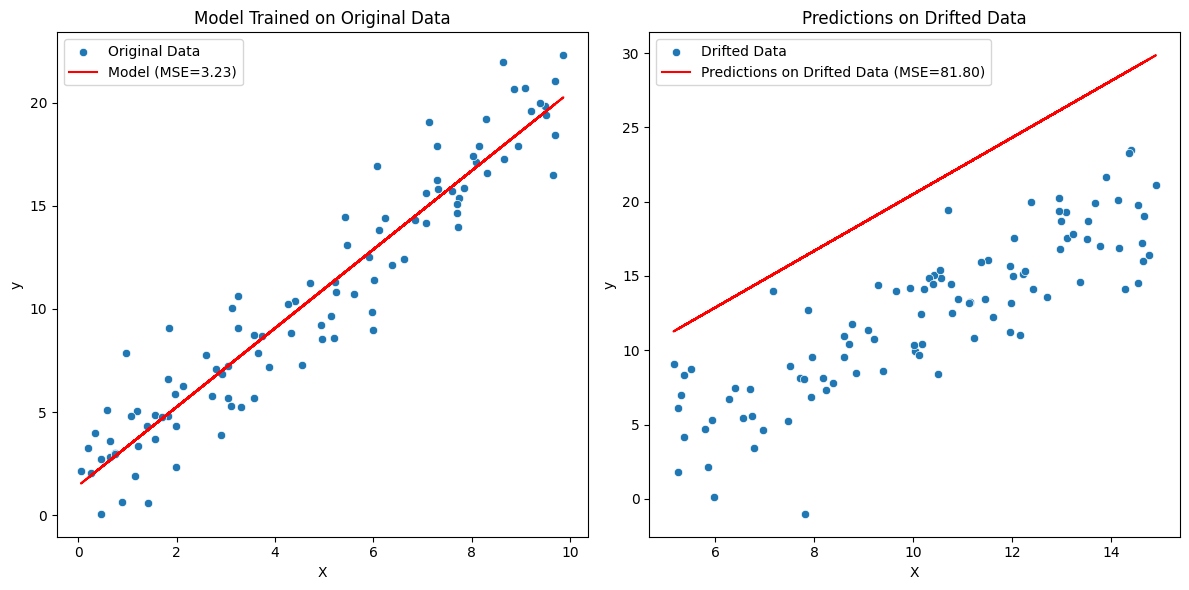

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Original Data
np.random.seed(42)
n_samples = 100
X_original = np.random.rand(n_samples, 1) * 10
y_original = 2 * X_original + 1 + np.random.randn(n_samples, 1) * 2

# Train the linear regression model
model = LinearRegression()
model.fit(X_original, y_original)

print(f"Model coefficients (original data): Intercept = {model.intercept_[0]:.2f}, Slope = {model.coef_[0][0]:.2f}")

# 2. Generate Drifted Data
# Let's simulate a drift where the relationship between X and y changes
X_drifted = np.random.rand(n_samples, 1) * 10 + 5  # Shift in X distribution
y_drifted = 1.5 * X_drifted - 3 + np.random.randn(n_samples, 1) * 3 # Change in the underlying relationship

# Make predictions on the drifted data using the original model
y_pred_drifted = model.predict(X_drifted)

# 3. Evaluate Errors
# Evaluate the model on the original data
y_pred_original = model.predict(X_original)
mse_original = mean_squared_error(y_original, y_pred_original)
print(f"Mean Squared Error on Original Data: {mse_original:.2f}")

# Evaluate the model on the drifted data
mse_drifted = mean_squared_error(y_drifted, y_pred_drifted)
print(f"Mean Squared Error on Drifted Data: {mse_drifted:.2f}")

# Compare Errors
print(f"\nComparison of Errors:")
print(f"Increase in Mean Squared Error due to drift: {mse_drifted - mse_original:.2f}")

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot original data and model
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_original.flatten(), y=y_original.flatten(), label='Original Data')
plt.plot(X_original, y_pred_original, color='red', label=f'Model (MSE={mse_original:.2f})')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Model Trained on Original Data")
plt.legend()

# Plot drifted data and predictions from the original model
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_drifted.flatten(), y=y_drifted.flatten(), label='Drifted Data')
plt.plot(X_drifted, y_pred_drifted, color='red', label=f'Predictions on Drifted Data (MSE={mse_drifted:.2f})')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Predictions on Drifted Data")
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
# Monitoring Data Distribution Changes
# Question: Use Python to monitor distribution changes in features to detect potential data drift.

# 1. Calculate feature statistics (mean and standard deviation) for both original and drifted data:
# 2. Compare statistics:
# 3. Set thresholds to detect significant drift:




In [4]:
import numpy as np
import pandas as pd

# 1. Generate Original and Drifted Data (Reusing from the previous example for consistency)
np.random.seed(42)
n_samples = 100
X_original = pd.DataFrame({'feature_1': np.random.rand(n_samples) * 10,
                           'feature_2': np.random.randn(n_samples) * 3 + 5})
y_original = 2 * X_original['feature_1'] + 1 + np.random.randn(n_samples) * 2

X_drifted = pd.DataFrame({'feature_1': np.random.rand(n_samples) * 10 + 5,
                          'feature_2': np.random.randn(n_samples) * 5 + 1})
y_drifted = 1.5 * X_drifted['feature_1'] - 3 + np.random.randn(n_samples) * 3

# 2. Calculate Feature Statistics
original_stats = X_original.agg(['mean', 'std']).T
drifted_stats = X_drifted.agg(['mean', 'std']).T

print("Original Data Feature Statistics:")
print(original_stats)
print("\nDrifted Data Feature Statistics:")
print(drifted_stats)

# 3. Compare Statistics and Set Thresholds
drift_threshold_mean = 0.5
drift_threshold_std = 0.3

drift_detected = {}

for feature in original_stats.index:
    mean_diff_abs = abs(original_stats.loc[feature, 'mean'] - drifted_stats.loc[feature, 'mean'])
    std_diff_abs = abs(original_stats.loc[feature, 'std'] - drifted_stats.loc[feature, 'std'])

    mean_drift = mean_diff_abs > drift_threshold_mean
    std_drift = std_diff_abs > drift_threshold_std

    drift_detected[feature] = {'mean_drift': mean_drift, 'std_drift': std_drift,
                               'mean_difference': mean_diff_abs, 'std_difference': std_diff_abs}

print("\nDrift Detection:")
for feature, detection in drift_detected.items():
    print(f"Feature: {feature}")
    print(f"  Absolute Mean Difference: {detection['mean_difference']:.2f} (Threshold: {drift_threshold_mean}) - Drift Detected: {detection['mean_drift']}")
    print(f"  Absolute Std Difference: {detection['std_difference']:.2f} (Threshold: {drift_threshold_std}) - Drift Detected: {detection['std_drift']}")
    if detection['mean_drift'] or detection['std_drift']:
        print("  Potential Data Drift Detected for this feature.")
    else:
        print("  No significant drift detected for this feature based on the thresholds.")

Original Data Feature Statistics:
               mean       std
feature_1  4.701807  2.974894
feature_2  4.996759  2.738788

Drifted Data Feature Statistics:
                mean       std
feature_1  10.205349  3.122871
feature_2   1.228227  5.132211

Drift Detection:
Feature: feature_1
  Absolute Mean Difference: 5.50 (Threshold: 0.5) - Drift Detected: True
  Absolute Std Difference: 0.15 (Threshold: 0.3) - Drift Detected: False
  Potential Data Drift Detected for this feature.
Feature: feature_2
  Absolute Mean Difference: 3.77 (Threshold: 0.5) - Drift Detected: True
  Absolute Std Difference: 2.39 (Threshold: 0.3) - Drift Detected: True
  Potential Data Drift Detected for this feature.


In [5]:
# Automating Data Quality Checks with Python
# Question: Automate a basic data validation process using Python to ensure the dataset's
# structural integrity.

# 1. Define validation checks:
# 2. Apply validation:




In [6]:
import pandas as pd

# 1. Define Validation Checks
def check_missing_values(df):
    """Checks for missing values in the DataFrame."""
    missing = df.isnull().sum().sum()
    if missing > 0:
        return f"FAILED: обнаружено {missing} отсутствующих значений."
    else:
        return "PASSED: Отсутствующие значения не обнаружены."

def check_duplicate_rows(df):
    """Checks for duplicate rows in the DataFrame."""
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        return f"FAILED: обнаружено {duplicates} дублирующихся строк."
    else:
        return "PASSED: Дублирующиеся строки не обнаружены."

def check_column_datatypes(df, expected_dtypes):
    """Checks if column datatypes match the expected types."""
    mismatched_dtypes = {}
    for col, expected_type in expected_dtypes.items():
        actual_type = str(df[col].dtype)
        if actual_type != expected_type:
            mismatched_dtypes[col] = f"Expected: {expected_type}, Actual: {actual_type}"
    if mismatched_dtypes:
        error_message = "FAILED: Несоответствие типов данных столбцов:\n"
        for col, mismatch in mismatched_dtypes.items():
            error_message += f"  - Столбец '{col}': {mismatch}\n"
        return error_message.strip()
    else:
        return "PASSED: Типы данных столбцов соответствуют ожиданиям."

def check_column_presence(df, expected_columns):
    """Checks if all expected columns are present in the DataFrame."""
    missing_columns = set(expected_columns) - set(df.columns)
    if missing_columns:
        return f"FAILED: Отсутствуют следующие столбцы: {', '.join(missing_columns)}"
    else:
        return "PASSED: Все ожидаемые столбцы присутствуют."

# 2. Apply Validation
def validate_data(df, expected_dtypes=None, expected_columns=None):
    """Applies a series of data validation checks to the DataFrame."""
    validation_results = {}

    validation_results['missing_values'] = check_missing_values(df)
    validation_results['duplicate_rows'] = check_duplicate_rows(df)

    if expected_dtypes:
        validation_results['column_datatypes'] = check_column_datatypes(df, expected_dtypes)

    if expected_columns:
        validation_results['column_presence'] = check_column_presence(df, expected_columns)

    print("Результаты валидации данных:")
    for check, result in validation_results.items():
        print(f"- {check}: {result}")

# Sample Data
data = {'col1': [1, 2, None, 4, 5],
        'col2': ['a', 'b', 'a', 'c', 'b'],
        'col3': [1.1, 2.2, 3.3, 4.4, 5.5]}
df = pd.DataFrame(data)

# Introduce some intentional issues for demonstration
df.iloc[1] = df.iloc[0]  # Introduce a duplicate row
df = df.astype({'col1': 'float64'}) # Intentionally change datatype

# Define expected datatypes and columns
expected_dtypes = {'col1': 'int64', 'col2': 'object', 'col3': 'float64'}
expected_columns = ['col1', 'col2', 'col3', 'new_column'] # Intentionally add a missing expected column

# Run the validation
validate_data(df, expected_dtypes=expected_dtypes, expected_columns=expected_columns)

print("\n--- Validating a 'clean' DataFrame ---")
clean_data = {'col1': [1, 2, 3, 4, 5],
              'col2': ['a', 'b', 'c', 'd', 'e'],
              'col3': [1.1, 2.2, 3.3, 4.4, 5.5]}
clean_df = pd.DataFrame(clean_data)
validate_data(clean_df, expected_dtypes={'col1': 'int64', 'col2': 'object', 'col3': 'float64'}, expected_columns=['col1', 'col2', 'col3'])

Результаты валидации данных:
- missing_values: FAILED: обнаружено 1 отсутствующих значений.
- duplicate_rows: FAILED: обнаружено 1 дублирующихся строк.
- column_datatypes: FAILED: Несоответствие типов данных столбцов:
  - Столбец 'col1': Expected: int64, Actual: float64
- column_presence: FAILED: Отсутствуют следующие столбцы: new_column

--- Validating a 'clean' DataFrame ---
Результаты валидации данных:
- missing_values: PASSED: Отсутствующие значения не обнаружены.
- duplicate_rows: PASSED: Дублирующиеся строки не обнаружены.
- column_datatypes: PASSED: Типы данных столбцов соответствуют ожиданиям.
- column_presence: PASSED: Все ожидаемые столбцы присутствуют.


In [7]:
# Introducing Great Expectations for Data Validation
# Question: Use Great Expectations to set up data validation checks for a dataset.

# 1. Install Great Expectations:
# 2. Create a new expectations suite:
# 3. Load data and generate expectations:




In [8]:
# Note: This script assumes you have Great Expectations installed.
# If not, you can install it using: pip install great_expectations

import great_expectations as gx
import pandas as pd
import os

# 1. Initialize DataContext (if not already initialized)
context = gx.get_context()

# Define the path to your data file
data_file_path = 'sample_data.csv'

# Create a sample CSV file for demonstration if it doesn't exist
if not os.path.exists(data_file_path):
    data = {'col1': [1, 2, None, 4, 5],
            'col2': ['a', 'b', 'a', 'c', 'b'],
            'col3': [1.1, 2.2, 3.3, 4.4, 5.5]}
    df = pd.DataFrame(data)
    df.to_csv(data_file_path, index=False)

# Create a Pandas Datasource
datasource_name = "pandas_example"
datasource_config = {
    "type": "pandas",
    "batch_kwargs_generators": {
        "default": {
            "type": "partition_and_sample",
            "batch_kwargs_format": "{filename}",
            "partitioners": {
                "default_partitioner": {
                    "type": "identity",
                    "subdir": ".",
                    "reader_method": "read_csv",
                    "reader_options": {
                        "header": 0
                    }
                }
            }
        }
    },
}
try:
    context.get_datasource(datasource_name)
    print(f"Datasource '{datasource_name}' already exists.")
except gx.exceptions.exceptions.DatasourceNotFoundError:
    context.add_datasource(**datasource_config)
    print(f"Datasource '{datasource_name}' created successfully.")

# Get a Batch of Data
batch_kwargs = {'path': data_file_path, 'datasource': datasource_name, 'partitioner': 'default_partitioner'}
batch = context.get_batch(**batch_kwargs)

# 2. Create a New Expectations Suite
expectation_suite_name = "my_sample_suite"
try:
    suite = context.get_expectation_suite(expectation_suite_name)
    print(f"Expectation Suite '{expectation_suite_name}' already exists.")
except gx.exceptions.exceptions.ExpectationSuiteNotFoundError:
    suite = context.create_expectation_suite(expectation_suite_name)
    print(f"Expectation Suite '{expectation_suite_name}' created successfully.")

# 3. Load Data and Generate Expectations
# You can now interactively add expectations or define them programmatically

# Example Expectations:

# Expect the column 'col1' to not have missing values
suite.add_expectation(
    expectation_type="expect_column_values_to_not_be_null",
    kwargs={"column": "col1"}
)

# Expect the column 'col2' to have only the values 'a', 'b', or 'c'
suite.add_expectation(
    expectation_type="expect_column_values_to_be_in_set",
    kwargs={"column": "col2", "value_set": ["a", "b", "c"]}
)

# Expect the column 'col3' to have values greater than 1
suite.add_expectation(
    expectation_type="expect_column_values_to_be_greater_than",
    kwargs={"column": "col3", "value": 1}
)

# Expect the number of columns to be 3
suite.add_expectation(
    expectation_type="expect_table_column_count_to_equal",
    kwargs={"value": 3}
)

# Save the Expectation Suite
context.save_expectation_suite(suite)
print(f"\nExpectation Suite '{expectation_suite_name}' saved.")

# Run the Validation
results = context.run_checkpoint(
    validations=[
        {
            "batch_request": {
                "datasource_name": datasource_name,
                "batch_kwargs": batch_kwargs,
            },
            "expectation_suite_name": expectation_suite_name,
        }
    ]
)

# Print Validation Results
print("\nValidation Results:")
for result in results['run_results'].values():
    validation_result = result['validation_result']
    print(f"  Success: {validation_result['success']}")
    for expectation_result in validation_result['results']:
        if not expectation_result['success']:
            print(f"    - Expectation '{expectation_result['expectation_config']['expectation_type']}' failed:")
            if 'details' in expectation_result:
                print(f"      Details: {expectation_result['details']}")

/workspaces/AI_DATA_ANALYSIS_/.venv/lib/python3.10/site-packages/great_expectations/data_context/data_context/abstract_data_context.py:914: DeprecationWarning: context.get_datasource is deprecated as of v1.2.0. Please use context.data_sources.get instead
  warnings.warn(


ValueError: "Could not find a datasource named 'pandas_example'"

In [ ]:
# Automating Constraint Checks with Python
# Question: Automate primary key and foreign key constraint checks using Python to ensure dataset compliance.


# 1. Assuming datasets exist with primary and foreign key relationships in pandas dataframes employees_df and departments_df :




In [ ]:
import pandas as pd

# 1. Assuming datasets exist with primary and foreign key relationships
# Create sample DataFrames
employees_data = {'employee_id': [101, 102, 103, 104, 105, 101],  # Intentional duplicate PK
                  'employee_name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Alice'],
                  'department_id': [1, 2, 1, 3, 2, 4]}
employees_df = pd.DataFrame(employees_data)

departments_data = {'department_id': [1, 2, 3, 4, 5],
                    'department_name': ['HR', 'Finance', 'Marketing', 'Sales', 'Operations']}
departments_df = pd.DataFrame(departments_data)

# Define primary and foreign key columns
employee_pk_col = 'employee_id'
department_pk_col = 'department_id'
employee_fk_col = 'department_id'

# 2. Define Validation Checks
def check_primary_key_uniqueness(df, pk_column):
    """Checks if the primary key column has unique values."""
    duplicates = df[pk_column].duplicated(keep=False).sum()
    if duplicates > 0:
        duplicate_values = df[df[pk_column].duplicated(keep=False)][pk_column].unique()
        return f"FAILED: Primary key column '{pk_column}' has {duplicates} duplicate(s): {duplicate_values}"
    else:
        return f"PASSED: Primary key column '{pk_column}' has unique values."

def check_primary_key_not_null(df, pk_column):
    """Checks if the primary key column has any null values."""
    null_values = df[pk_column].isnull().sum()
    if null_values > 0:
        return f"FAILED: Primary key column '{pk_column}' has {null_values} null value(s)."
    else:
        return f"PASSED: Primary key column '{pk_column}' has no null values."

def check_foreign_key_references_primary_key(fk_df, fk_column, pk_df, pk_column):
    """Checks if all foreign key values exist in the primary key column of the referenced table."""
    foreign_key_values = fk_df[fk_column].unique()
    primary_key_values = pk_df[pk_column].unique()
    unreferenced_values = set(foreign_key_values) - set(primary_key_values)
    if unreferenced_values:
        return f"FAILED: Foreign key column '{fk_column}' has unreferenced values: {unreferenced_values}"
    else:
        return f"PASSED: All foreign key values in '{fk_column}' reference primary key values in '{pk_column}'."

def check_foreign_key_not_null(df, fk_column):
    """Checks if the foreign key column has any null values (depending on business rules)."""
    null_values = df[fk_column].isnull().sum()
    if null_values > 0:
        return f"WARNING: Foreign key column '{fk_column}' has {null_values} null value(s). (Consider if this is acceptable)"
    else:
        return f"PASSED: Foreign key column '{fk_column}' has no null values."

# 3. Apply Validation
def validate_constraints(employees_df, departments_df, employee_pk_col, department_pk_col, employee_fk_col):
    """Applies primary and foreign key constraint checks."""
    validation_results = {}

    # Primary Key checks for employees_df
    validation_results[f"Primary Key Check ({employee_pk_col} in employees) - Uniqueness"] = check_primary_key_uniqueness(employees_df, employee_pk_col)
    validation_results[f"Primary Key Check ({employee_pk_col} in employees) - Not Null"] = check_primary_key_not_null(employees_df, employee_pk_col)

    # Primary Key checks for departments_df
    validation_results[f"Primary Key Check ({department_pk_col} in departments) - Uniqueness"] = check_primary_key_uniqueness(departments_df, department_pk_col)
    validation_results[f"Primary Key Check ({department_pk_col} in departments) - Not Null"] = check_primary_key_not_null(departments_df, department_pk_col)

    # Foreign Key checks for employees_df referencing departments_df
    validation_results[f"Foreign Key Check ({employee_fk_col} in employees referencing {department_pk_col} in departments) - References"] = check_foreign_key_references_primary_key(employees_df, employee_fk_col, departments_df, department_pk_col)
    validation_results[f"Foreign Key Check ({employee_fk_col} in employees) - Not Null"] = check_foreign_key_not_null(employees_df, employee_fk_col) # Optional check

    print("Constraint Validation Results:")
    for check, result in validation_results.items():
        print(f"- {check}: {result}")

# Run the validation
validate_constraints(employees_df, departments_df, employee_pk_col, department_pk_col, employee_fk_col)

print("\n--- Validating 'clean' DataFrames ---")
clean_employees_data = {'employee_id': [101, 102, 103, 104, 105],
                        'employee_name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
                        'department_id': [1, 2, 1, 3, 2]}
clean_employees_df = pd.DataFrame(clean_employees_data)

validate_constraints(clean_employees_df, departments_df, employee_pk_col, department_pk_col, employee_fk_col)

In [ ]:
# Advanced Data Drift Detection using Statistical Tests
# Question: Implement Kolmogorov-Smirnov test using Python to detect data drift at a more sophisticated level.

# 1. Use SciPy to perform KS test:




In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

# 1. Generate Original and Drifted Data (for numerical features)
np.random.seed(42)
n_samples = 100

# Original Data - Feature 1 (normally distributed)
original_feature1 = np.random.normal(loc=5, scale=2, size=n_samples)

# Drifted Data - Feature 1 (shifted mean)
drifted_feature1 = np.random.normal(loc=6, scale=2, size=n_samples)

# Original Data - Feature 2 (uniform distribution)
original_feature2 = np.random.uniform(low=0, high=10, size=n_samples)

# Drifted Data - Feature 2 (different range)
drifted_feature2 = np.random.uniform(low=2, high=12, size=n_samples)

# Combine into DataFrames
original_df = pd.DataFrame({'feature1': original_feature1, 'feature2': original_feature2})
drifted_df = pd.DataFrame({'feature1': drifted_feature1, 'feature2': drifted_feature2})

# Define a significance level (alpha)
alpha = 0.05

# Perform Kolmogorov-Smirnov test for each feature
print("Kolmogorov-Smirnov Test for Data Drift:")

for column in original_df.columns:
    original_data = original_df[column]
    drifted_data = drifted_df[column]

    # Perform the KS test
    statistic, p_value = ks_2samp(original_data, drifted_data)

    print(f"\nFeature: {column}")
    print(f"  KS Statistic: {statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the results
    if p_value < alpha:
        print(f"  P-value ({p_value:.4f}) is less than the significance level ({alpha}).")
        print(f"  Conclusion: Significant data drift detected for feature '{column}'.")
    else:
        print(f"  P-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}).")
        print(f"  Conclusion: No significant data drift detected for feature '{column}' based on the KS test.")